In [1]:
!pip show pandas_datareader
!pip install yfinance
!pip install fix_yahoo_finance
!pip install --upgrade pandas-datareader

Name: pandas-datareader
Version: 0.9.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, requests, lxml
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 27.9 MB/s 
  Attempting uninstall: pandas-data

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy import stats 
import statsmodels.api as sm
!pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import HRPOpt
from pypfopt.efficient_frontier import EfficientCVaR
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 8.2 MB/s 


In [3]:
tickers = ['GOOGL', 'AMZN', 'NKE', 'NFLX',]
new_data = pd.DataFrame()
for t in tickers: 
  new_data[t] = wb.DataReader(t, data_source='yahoo', start= '1995-1-1',)['Adj Close']

new_data.tail()

,GOOGL,AMZN,NKE,NFLX
Date,,,,
2022-11-09,87.320000,86.139999,92.099998,254.660004
2022-11-10,93.940002,96.629997,99.489998,274.970001
2022-11-11,96.410004,100.790001,106.089996,290.130005
2022-11-14,95.699997,98.489998,104.389999,299.269989
2022-11-15,99.930000,100.615303,107.260002,311.190002


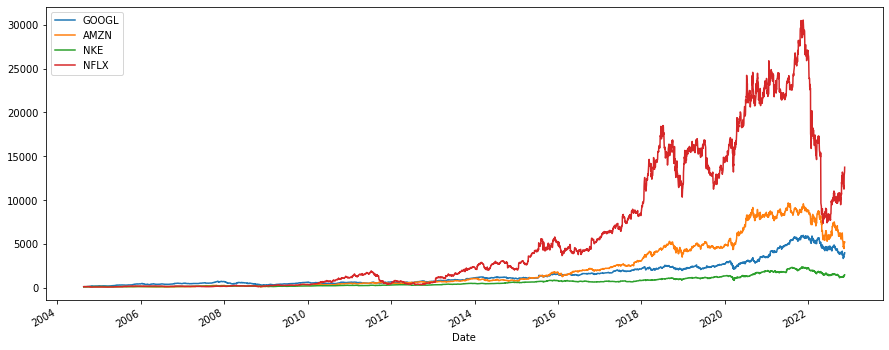

In [4]:
(new_data/new_data.iloc[0] * 100).plot(figsize=(15,6)); # normalizing to 100 
plt.show()

In [5]:
sec_returns = np.log(new_data/new_data.shift(1))
sec_returns

,GOOGL,AMZN,NKE,NFLX
Date,,,,
2004-08-19,NaN,NaN,NaN,NaN
2004-08-20,0.076433,0.022525,0.008248,-0.000631
2004-08-23,0.010014,-0.001520,-0.004319,0.004409
2004-08-24,-0.042290,-0.010191,0.007143,-0.028692
2004-08-25,0.010718,0.031509,0.007758,0.013492
...,...,...,...,...
2022-11-09,-0.017933,-0.043614,-0.017757,-0.033972
2022-11-10,0.073077,0.114915,0.077182,0.076733
2022-11-11,0.025954,0.042150,0.064231,0.053667


In [6]:
sec_returns[['GOOGL', 'AMZN','NKE','NFLX']].mean() * 250 
# ANNUAL RETURNS HERE NTFLX AT 1ST

GOOGL    0.200511
AMZN     0.215165
NKE      0.145372
NFLX     0.267970
dtype: float64

In [7]:
sec_returns[['GOOGL', 'AMZN','NKE','NFLX']].std() * 250 ** 0.5
# NFLX HAS THE HIGHEST VOLATILITY, WHILE NIKE HAS THE LOWEST

GOOGL    0.304492
AMZN     0.382516
NKE      0.281693
NFLX     0.534880
dtype: float64

In [8]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,GOOGL,AMZN,NKE,NFLX
GOOGL,0.092716,0.059777,0.036735,0.047612
AMZN,0.059777,0.146318,0.043703,0.078097
NKE,0.036735,0.043703,0.079351,0.040589
NFLX,0.047612,0.078097,0.040589,0.286097


In [9]:
corr_matrix = sec_returns.corr()
corr_matrix

,GOOGL,AMZN,NKE,NFLX
GOOGL,1.000000,0.513226,0.428281,0.292336
AMZN,0.513226,1.000000,0.405590,0.381707
NKE,0.428281,0.405590,1.000000,0.269385
NFLX,0.292336,0.381707,0.269385,1.000000


### CALCULATING PORTFOLIO RISK 

In [10]:
weights = np.array([0.25, 0.25,0.25,0.25])

In [11]:
pfolio_var= np.dot(weights.T, np.dot(sec_returns.cov()* 250, weights)) # notice on this line of code we've used the transform (.t()) function on the weightings of the stock. notice also the annualise covariance of the returns
pfolio_var

0.07609427418163016

In [12]:
pfolio_vol= np.dot(weights.T, np.dot(sec_returns.cov()* 250, weights)) * 0.5
pfolio_vol

0.03804713709081508

In [13]:
print(str(round(pfolio_vol,5)* 100) + ' %') 

3.805 %


In [14]:
google_var_a = sec_returns['GOOGL'].var() *250 # swtiching from double [[]] to single [] will automaticallt store the output as a float 
google_var_a

0.09271564148341424

In [15]:
amazon_var_a = sec_returns['AMZN'].var() *250 # swtiching from double [[]] to single [] will automaticallt store the output as a float 
amazon_var_a

0.14631835941667015

In [16]:
nike_var_a = sec_returns['NKE'].var() *250 # swtiching from double [[]] to single [] will automaticallt store the output as a float 
nike_var_a

0.07935122267372524

In [17]:
nflx_var_a = sec_returns['NFLX'].var() *250 # swtiching from double [[]] to single [] will automaticallt store the output as a float 
nflx_var_a

0.2860965535191493

In [18]:
dr = pfolio_var -(weights[0] ** 2 * google_var_a) - (weights[1]**2 * amazon_var_a) - (weights[2]**2 * nike_var_a) - (weights[3]**2 * nflx_var_a)
dr

0.038314163113320227

In [19]:
print(str(round(dr*100,3))+ ' %') 
# the diversifiable risk of this portfolio is 3.83%

3.831 %


## 3 Ways/Methods/Codes for Portfolio Optimzation

In [20]:
mu = expected_returns.mean_historical_return(new_data) # annualised daily historical data
S = risk_models.sample_cov(new_data) # annualised covaraince matric of daily assets returns

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() # optimisezes for maximal sharpe ratio 
ef.portfolio_performance(verbose=True) # here to be used to know the expected performance of our portfolio

Expected annual return: 23.2%
Annual volatility: 26.8%
Sharpe Ratio: 0.79


(0.23232775393778066, 0.2682988138001572, 0.7913853622026572)

In [21]:
# here using PyPortfolioOpt to tell us how much of each stock should be bought

latest_prices = get_latest_prices(new_data)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)

allocation, leftover = da.greedy_portfolio() #making the most optimal decisions 
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))
#using the 1M$ it's suggested we buy the most in Google stocks etc 

Discrete allocation: {'GOOGL': 4570, 'NFLX': 650, 'NKE': 1688, 'AMZN': 1590}
Funds remaining: $13.18


In [22]:
#this method here is a robust methode that improves the robustness and diversifcation of a portfolio leading to a good portfolio performance 
# notice this method has a lower sharpe method, expected return and annual volatility 
#results here are more likely to coincide with the reality 

returns = new_data.pct_change().dropna()
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()
hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

Expected annual return: 25.0%
Annual volatility: 25.0%
Sharpe Ratio: 0.92
{'AMZN': 0.18183077926293656, 'GOOGL': 0.28807589534523537, 'NFLX': 0.11846179646352015, 'NKE': 0.4116315289283079}


In [23]:
# HRPO tells us to reduce the amount of stocks bought in Google and spend majority of our money in Nike while giving us for remaining funds

da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'NKE': 383, 'GOOGL': 288, 'AMZN': 181, 'NFLX': 38}
Funds remaining (HRP): $102.99


In [24]:
# here is a worst case scenario for every asset/stock in portfolio e.g. losing most money 
# worst case loss used the calculate weightings 

S = new_data.cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))

{'GOOGL': 0.0, 'AMZN': 0.0, 'NKE': 0.0, 'NFLX': 1.0}


In [25]:
# this algorithm suggest than we spend all of the million into NETFLIX 

da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f}".format(leftover))

Discrete allocation (CVAR): {'NFLX': 321, 'AMZN': 1}
Funds remaining (CVAR): $7.39


/usr/local/lib/python3.7/dist-packages/pypfopt/discrete_allocation.py:210: RuntimeWarning: invalid value encountered in true_divide
  current_weights /= current_weights.sum()


In [26]:
tickers = ['GOOGL','AMZN', 'NKE','NFLX', '^GSPC'] # beta indicator shows the extent to which the change in the price of a security is realted to the overall performance of the market. Beta is a fraction 
data_SP = pd.DataFrame()
for t in tickers:
  data_SP[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1', end='2016-12-31')['Adj Close']

In [27]:
sec_returns_SP= np.log(data_SP/data_SP.shift(1))

In [28]:
cov = sec_returns_SP.cov() * 250 # remember 250 is trading days in a year 
cov

,GOOGL,AMZN,NKE,NFLX,^GSPC
GOOGL,0.052319,0.034554,0.016942,0.034017,0.016670
AMZN,0.034554,0.093727,0.020464,0.049004,0.019469
NKE,0.016942,0.020464,0.047349,0.023027,0.014631
NFLX,0.034017,0.049004,0.023027,0.288245,0.020269
^GSPC,0.016670,0.019469,0.014631,0.020269,0.016362


In [29]:
market_var = sec_returns_SP['^GSPC'].var() * 250 # annualized variance of the S&P500
market_var

0.01636163100230847

In [30]:
cov_with_market_GOOGL = cov.iloc[0,4] # iloc allows for the covariance between the stock and the market as a float 
cov_with_market_GOOGL

0.016670320895228123

In [31]:
cov_with_market_AMZN = cov.iloc[1,4] # iloc allows for the covariance between the stock and the market as a float 
cov_with_market_AMZN

0.019468952503465396

In [32]:
cov_with_market_NKE = cov.iloc[2,4] # iloc allows for the covariance between the stock and the market as a float 
cov_with_market_NKE

0.014631356287288467

In [33]:
cov_with_market_NFLX = cov.iloc[3,4] # iloc allows for the covariance between the stock and the market as a float 
cov_with_market_NFLX

0.02026873397497251

In [34]:
GOOGL_beta = cov_with_market_GOOGL / market_var
GOOGL_beta # OUTPERFOMS THE MARKET 

1.0188666944558338

In [35]:
AMZN_beta = cov_with_market_AMZN / market_var
AMZN_beta # OUTPERORMS THE MARKET 

1.1899151435892004

In [36]:
NKE_beta = cov_with_market_NKE / market_var
NKE_beta # DEFENSIVE STOCK SO LOSE LESS IF MARKET UNDERPERFORMS 

0.8942480297486309

In [37]:
NFLX_beta = cov_with_market_NFLX / market_var
NFLX_beta # OUTPERFORMS THE MARKET 

1.2387966683830471

### Calculating Future Stock Prices 

In [39]:
ticker = 'GOOGL'
data_GE = pd.DataFrame()
data_GE[ticker] = wb.DataReader(ticker, data_source='yahoo', start= '2007-1-1')['Adj Close']

In [41]:
log_returns_GE = np.log(1+ data_GE.pct_change())
log_returns_GE.tail()

,GOOGL
Date,
2022-11-09,-0.017933
2022-11-10,0.073077
2022-11-11,0.025954
2022-11-14,-0.007392
2022-11-15,0.036424


In [42]:
u = log_returns_GE.mean()
var = log_returns_GE.var()
print(u)
print(var)

GOOGL    0.000535
dtype: float64
GOOGL    0.000346
dtype: float64


In [43]:
stdev = log_returns_GE.std()
stdev

GOOGL    0.018608
dtype: float64

In [45]:
drift = u -(0.5 * var) # u = average log return - half variance 
drift

GOOGL    0.000362
dtype: float64

In [46]:
np.array(drift)

array([0.00036189])

In [47]:
norm.ppf(0.95)

1.6448536269514722

In [48]:
x = np.random.rand(10,2) # to complete the second component aka volatility need to randomize using numpy. (10,2) turn our arrray into a multi dimensional one 2 columns by 10 r 
x

array([[0.56064168, 0.57779959],
       [0.63332415, 0.69681234],
       [0.87688923, 0.09450448],
       [0.15149466, 0.02557893],
       [0.92481629, 0.95224474],
       [0.92965171, 0.21389232],
       [0.53631276, 0.49105274],
       [0.40356218, 0.03269715],
       [0.20588716, 0.98908431],
       [0.39805079, 0.80888822]])

In [49]:
norm.ppf(x)

array([[ 0.1525963 ,  0.19626748],
       [ 0.34067044,  0.5152543 ],
       [ 1.15957582, -1.3135165 ],
       [-1.03004405, -1.9501533 ],
       [ 1.43823488,  1.6670195 ],
       [ 1.47320196, -0.7929883 ],
       [ 0.09114864, -0.02242933],
       [-0.24413746, -1.84255297],
       [-0.8207752 ,  2.29328872],
       [-0.25839565,  0.87380665]])

In [50]:
t_intervals = 1000 # tintervals = time intervals. interested in forecast stock prices for next 1000 days 
iterations = 10 # asking computer to produce 10 series of future stock price predicitons 

In [53]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[0.99238751, 1.00303858, 0.99019724, ..., 1.0447566 , 1.00022483,
        0.98508158],
       [1.02632493, 0.9847161 , 1.01357514, ..., 0.97095509, 0.98911106,
        1.00311481],
       [1.00723094, 0.99926   , 1.03942152, ..., 1.05307746, 1.02596253,
        0.96137436],
       ...,
       [1.00074896, 0.99582941, 0.98059976, ..., 0.99455259, 1.00915658,
        0.99152083],
       [0.95744093, 0.9969117 , 0.99717049, ..., 1.01861092, 1.00589544,
        0.98181732],
       [0.98667741, 0.9747412 , 0.9972904 , ..., 1.01172937, 1.0048599 ,
        0.9955768 ]])

In [54]:
S0 = data_GE.iloc[-1]
S0

GOOGL    99.25
Name: 2022-11-15 00:00:00, dtype: float64

In [55]:
prices_list= np.zeros_like(daily_returns) #zeros_like Return an array of zeros with the same shape and type as a given array
prices_list 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
prices_list[0] = S0 # 1st row of prices_list must equal S0. as S0 will be the inital price for each of the iterations intended to be generated 
prices_list


array([[99.25, 99.25, 99.25, ..., 99.25, 99.25, 99.25],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [58]:
for t  in range(1, t_intervals): # this loop starts at day 1 and ends of day 1000
  prices_list[t] = prices_list[t-1] * daily_returns[t]

prices_list

array([[ 99.25      ,  99.25      ,  99.25      , ...,  99.25      ,
         99.25      ,  99.25      ],
       [101.86274903,  97.73307274, 100.59733285, ...,  96.3672926 ,
         98.1692723 ,  99.55914533],
       [102.59931201,  97.66074991, 104.56303221, ..., 101.48222338,
        100.71799485,  95.71360967],
       ...,
       [ 57.26528121, 485.20530376, 142.19229573, ..., 356.98334462,
        160.81889997, 195.30714993],
       [ 54.8281243 , 483.70684388, 141.78996132, ..., 363.62713486,
        161.76699815, 191.75594161],
       [ 54.09767187, 471.48898891, 141.40576768, ..., 367.8922506 ,
        162.5531698 , 190.90776623]])

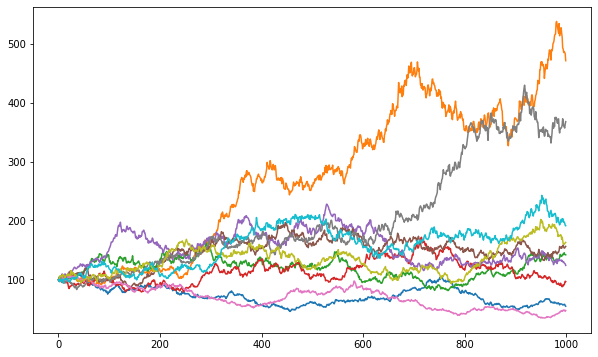

In [59]:
plt.figure(figsize=(10,6))
plt.plot(prices_list)